## Machine Learning Course Day - 5

### Name - Kattamuri V S J V S Hitesh Gupta
### Roll - CS20B1127

1. Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv
2. Perform Decision Tree classification on pima-indians-diabetes.csv
3. Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv and then perform decision tree classification. Compare the results.


Columns in csv file is in this order:
Fields description follow:
1. A. preg = Number of times pregnant
2. B. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. C. pres = Diastolic blood pressure (mm Hg)
4. D. skin = Triceps skin fold thickness (mm)
5. E. test = 2-Hour serum insulin (mu U/ml)
6. F. mass = Body mass index (weight in kg/(height in m)^2)
7. g. pedi = Diabetes pedigree function
8. H. age = Age (years)
9. I. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random
import sys,itertools
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.tree import DecisionTreeClassifier


In [3]:
columns_list = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv("pima-indians-diabetes.csv",names=columns_list)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# seperating the class/target column from the dataset
X = df.iloc[:,:-1].astype(int)
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33,0,50
1,1,85,66,29,0,26,0,31
2,8,183,64,0,0,23,0,32
3,1,89,66,23,94,28,0,21
4,0,137,40,35,168,43,2,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0,63
764,2,122,70,27,0,36,0,27
765,5,121,72,23,112,26,0,30
766,1,126,60,0,0,30,0,47


In [5]:
# storing the target column
y = df.iloc[:,-1].astype(int)
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int32

In [6]:
#splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# # using the linear discriminant analysis from sklearn
# clf = LinearDiscriminantAnalysis().fit(X_train,y_train)
# y_pred = clf.predict(X_test)

# print("Accuracy: {:.2f}".format(np.sum(y_pred==y_test.to_list())/y_test.shape[0]))

(8, 8)
(614, 2)


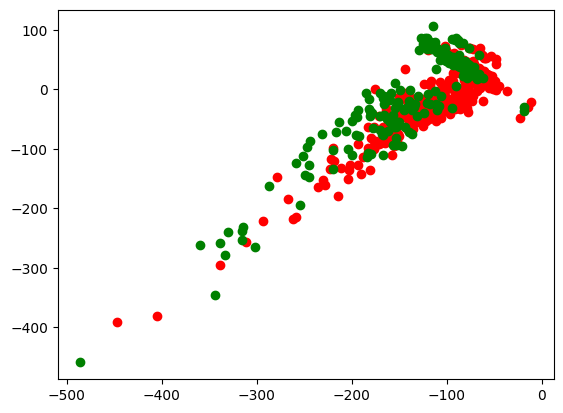

(8, 8)
(154, 2)


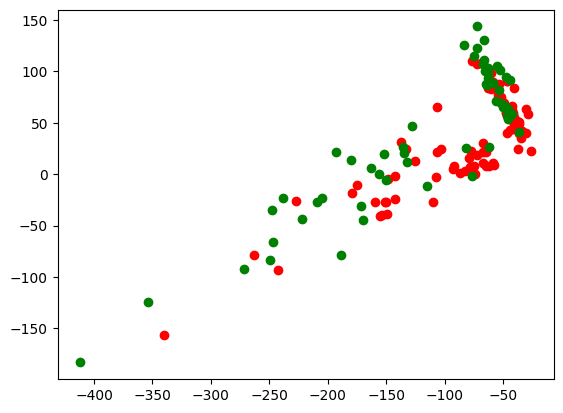

TypeError: 'NoneType' object is not subscriptable

In [10]:
# linear discriminant analysis classifier without using sklearn
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None

    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)

        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)

        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

    def fit(self,X,y):
        self.eig_vectors = self.transform(X,y)

    def predict(self,X):
        pc = X.dot(self.eig_vectors[:,::-1][:,:self.n_components])
        return pc

LDA_obj = LDA(n_components=2)
train = LDA_obj.transform(X_train.to_numpy(),y_train.to_numpy())
test = LDA_obj.transform(X_test.to_numpy(),y_test.to_numpy())
# y_pred=LDA_obj.predict(X_test)

# print(y_pred)
# print("Accuracy: {:.2f}".format(np.sum(y_pred==y_test.to_list())/y_test.shape[0]))

In [ ]:
# using the decision tree classifier from sklearn
# before performing Fisher Discriminant Analysis
clf = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy: {:.2f}".format(np.sum(y_pred==y_test.to_list())/y_test.shape[0]))

Accuracy: 0.71


In [ ]:
# using the decision tree classifier from sklearn
# after performing Fisher Discriminant Analysis
clf = DecisionTreeClassifier().fit(train,y_train)
y_pred = clf.predict(test)

print("Accuracy: {:.2f}".format(np.sum(y_pred==y_test.to_list())/y_test.shape[0]))


Accuracy: 0.66
